In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
import sqlite3
import glob

In [2]:
filenames = np.sort(glob.glob('*10yrs.db'))[::7]

In [3]:
ddf_name = 'DD:ELAISS1'

mjds = []

for filename in filenames:
    con = sqlite3.connect(filename)
    df = pd.read_sql('select observationStartMJD from observations where note="%s"' % ddf_name, con)
    mjds.append(df.values)
    con.close()

In [4]:
interp_to = np.arange(mjds[0][0]-10, mjds[0][-1]+100, 1)
ca = []
for mjd_arr in mjds:
    y = np.arange(mjd_arr.size)
    ca.append(np.interp(interp_to, np.ravel(mjd_arr), y))

In [5]:
ca

[array([    0.,     0.,     0., ..., 21746., 21746., 21746.]),
 array([    0.,     0.,     0., ..., 21385., 21385., 21385.]),
 array([    0.,     0.,     0., ..., 20891., 20891., 20891.]),
 array([    0.,     0.,     0., ..., 21748., 21748., 21748.]),
 array([    0.,     0.,     0., ..., 22862., 22862., 22862.]),
 array([    0.,     0.,     0., ..., 22951., 22951., 22951.])]

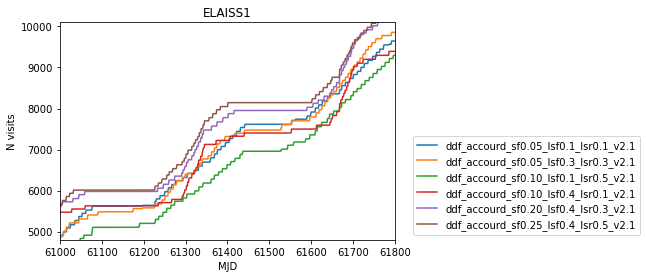

In [6]:
for curve, name in zip(ca, filenames):
    plt.plot(interp_to, curve, label=name.replace('_10yrs.db', ''))
plt.xlim([61000,61800])
plt.ylim([4800,10100])
plt.title(ddf_name.replace('DD:', ''))
plt.xlabel('MJD')
plt.ylabel('N visits')
plt.legend(bbox_to_anchor=(1.04,0.5))
plt.savefig('ddf_nvis_t.pdf', bbox_inches="tight")